In [15]:
import solcore
from solcore import si, material
from solcore.structure import Layer, Structure, Junction
from solcore.solar_cell import SolarCell
import solcore.quantum_mechanics as QM
import solcore.poisson_drift_diffusion as PDD
import matplotlib.pyplot as plt
import numpy as np

In [4]:
T = 300
wl = np.linspace(350, 1200, 401) * 1e-9

def printstructure(solar_cell):
    space = "+" +'='*70 + "+"
    print(space+ '\n' + f"\n".join(["{}".format(layer) for layer in solar_cell])+ '\n' + space)
    return str(space+ '\n' + f"\n".join(["{}".format(layer) for layer in solar_cell])+ '\n' + space)

def show_QD_graph(list_struc):
    # struc = Structure( list_struc ,substrate = p_GaAs, T=T)
    result_band_edge, bands = QM.schrodinger(Structure(

        [Layer(width=si("100 nm"), material=n_GaAs, role="Emitter")]+
        list_struc*10
        +[Layer(width=si("100 nm"), material=p_GaAs, role="Emitter"),]
        , substrate=i_GaAs, T=T, ), quasiconfined=0.01, num_eigenvalues=200, show=True, graphtype='potentialsLDOS')
    return result_band_edge, bands
def nkplot(Material,range_min_nm,range_max_nm,plot=False,):
    import matplotlib.pyplot as plt
    from solcore import siUnits as unit
    n = [Material.n(unit(i,'nm')) for i in range(range_min_nm, range_max_nm)]
    k = [Material.k(unit(i,'nm')) for i in range(range_min_nm, range_max_nm)]
    if plot is True:
        plt.plot(n, label=F'n_{Material}', color='red')
        plt.plot(k, label=F'k_{Material}', color='blue')
        plt.legend()
        plt.show()
    return n,k,[i for i in range(range_min_nm, range_max_nm)]

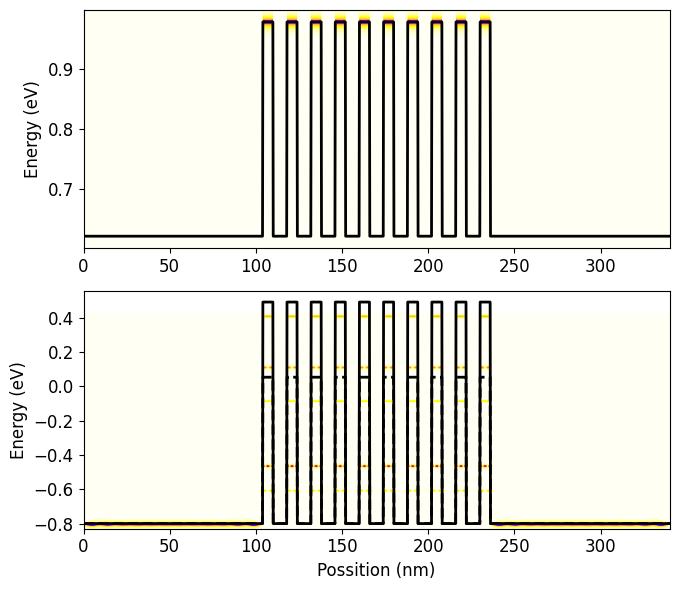

In [5]:
i_GaAs = material("GaAs")(T=T, strained=True)
p_GaAs_min = material("GaAs")(T=T, Na=si('1e16 cm-3'))
p_GaAs = material("GaAs")(T=T, Na=si("1e17 cm-3"))
n_GaAs = material("GaAs")(T=T, Nd=si('1e16 cm-3'))
InSb = material("InSb")(T=T, strained=True)
result_band_edge, bands = show_QD_graph([
    # Layer(width=barrier, material=Bmat, role="barrier"),
    Layer(width=si("4 nm"), material=i_GaAs, role="barrier"),
    Layer(width=si("6 nm"), material=InSb, role="well"), # 5-20 nm
    Layer(width=si("4 nm"), material=i_GaAs, role="barrier"),
])

In [14]:
for i in bands:
    print(i)
    print(len(bands[i]))
print('===========================================')
for i in result_band_edge:
    print(i)
    print(len(result_band_edge[i]))

x
1700
Ee
200
psi_e
200
Ehh
54
psi_hh
54
Elh
30
psi_lh
30
Ve
1700
me
1700
Vhh
1700
Vlh
1700
mhh
1700
mlh
1700
x
1700
potentials
5
effective_masses
4
wavefunctions
3
E
3
LDOS
5


In [7]:
result_band_edge['potentials']

{'x': array([0.00000000e+00, 2.00117716e-10, 4.00235433e-10, ...,
        3.39599765e-07, 3.39799882e-07, 3.40000000e-07]),
 'Ve': array([9.97326236e-20, 9.97326236e-20, 9.97326236e-20, ...,
        9.97326236e-20, 9.97326236e-20, 9.97326236e-20]),
 'Vhh': array([-1.28174117e-19, -1.28174117e-19, -1.28174117e-19, ...,
        -1.28174117e-19, -1.28174117e-19, -1.28174117e-19]),
 'Vlh': array([-1.28174117e-19, -1.28174117e-19, -1.28174117e-19, ...,
        -1.28174117e-19, -1.28174117e-19, -1.28174117e-19]),
 'Vso': array([-1.82808334e-19, -1.82808334e-19, -1.82808334e-19, ...,
        -1.82808334e-19, -1.82808334e-19, -1.82808334e-19])}

In [8]:
result_band_edge['effective_masses']


{'x': array([0.00000000e+00, 2.00117716e-10, 4.00235433e-10, ...,
        3.39599765e-07, 3.39799882e-07, 3.40000000e-07]),
 'me': array([6.85082235e-32, 6.85082235e-32, 6.85082235e-32, ...,
        6.85082235e-32, 6.85082235e-32, 6.85082235e-32]),
 'mhh': array([4.57642723e-31, 4.57642723e-31, 4.57642723e-31, ...,
        4.57642723e-31, 4.57642723e-31, 4.57642723e-31]),
 'mlh': array([9.05805267e-32, 9.05805267e-32, 9.05805267e-32, ...,
        9.05805267e-32, 9.05805267e-32, 9.05805267e-32])}

In [9]:
result_band_edge['wavefunctions']


{'psi_e': [array([  0.35159397,   0.70317677,   1.05473719, ..., -71.70735922,
         -47.80617309, -23.90346663]),
  array([-2.39060275e+01, -4.78112948e+01, -7.17150415e+01, ...,
          1.03235524e-01,  6.88255069e-02,  3.44133007e-02]),
  array([  -0.31872058,   -0.63740042,   -0.95599878, ..., -144.23648229,
          -96.16789861,  -48.08702259]),
  array([ 4.80880787e+01,  9.61700107e+01,  1.44239650e+02, ...,
         -9.67666322e-03, -6.45179606e-03, -3.22610421e-03]),
  array([  -3.28563021,   -6.57030898,   -9.85308513, ..., -217.76658653,
         -145.21276737,  -72.61689781]),
  array([ -72.61060705, -145.20018769, -217.74772156, ...,   10.26154244,
            6.84267958,    3.42183523]),
  array([  1.458437  ,   2.9161173 ,   4.37228461, ..., 292.91280464,
         195.35967451,  97.70518394]),
  array([ -97.50529139, -194.95999313, -292.3135418 , ...,   19.23073779,
           12.8260377 ,    6.41468295]),
  array([  11.42893263,   22.84852617,   34.24944919, ..., 

In [10]:
result_band_edge['E']


{'Ee': array([9.97970795e-20, 9.97970795e-20, 9.99916911e-20, 9.99916911e-20,
        1.00319536e-19, 1.00319536e-19, 1.00784202e-19, 1.00784202e-19,
        1.01388800e-19, 1.01388800e-19, 1.01964625e-19, 1.01964625e-19,
        1.01964625e-19, 1.01964625e-19, 1.01964625e-19, 1.01964625e-19,
        1.01964625e-19, 1.01964625e-19, 1.01964625e-19, 1.02135634e-19,
        1.02135634e-19, 1.03026269e-19, 1.03026269e-19, 1.04061725e-19,
        1.04061725e-19, 1.05242651e-19, 1.05242651e-19, 1.06569457e-19,
        1.06569457e-19, 1.08042394e-19, 1.08042394e-19, 1.09661611e-19,
        1.09661611e-19, 1.11427190e-19, 1.11427190e-19, 1.13339161e-19,
        1.13339161e-19, 1.15397525e-19, 1.15397525e-19, 1.15887337e-19,
        1.15887337e-19, 1.15887337e-19, 1.15887337e-19, 1.15887337e-19,
        1.15887337e-19, 1.15887337e-19, 1.15887337e-19, 1.15887337e-19,
        1.17602256e-19, 1.17602256e-19, 1.19953307e-19, 1.19953307e-19,
        1.22450619e-19, 1.22450619e-19, 1.25094120e-19, 1.

In [11]:
result_band_edge['LDOS']

{'x': array([0.00000000e+00, 2.00117716e-10, 4.00235433e-10, ...,
        3.39599765e-07, 3.39799882e-07, 3.40000000e-07]),
 'Ee': array([9.65927265e-20, 9.67529442e-20, 9.69131618e-20, 9.70733795e-20,
        9.72335971e-20, 9.73938148e-20, 9.75540324e-20, 9.77142501e-20,
        9.78744677e-20, 9.80346854e-20, 9.81949030e-20, 9.83551207e-20,
        9.85153383e-20, 9.86755559e-20, 9.88357736e-20, 9.89959912e-20,
        9.91562089e-20, 9.93164265e-20, 9.94766442e-20, 9.96368618e-20,
        9.97970795e-20, 9.99572971e-20, 1.00117515e-19, 1.00277732e-19,
        1.00437950e-19, 1.00598168e-19, 1.00758385e-19, 1.00918603e-19,
        1.01078821e-19, 1.01239038e-19, 1.01399256e-19, 1.01559474e-19,
        1.01719691e-19, 1.01879909e-19, 1.02040127e-19, 1.02200344e-19,
        1.02360562e-19, 1.02520779e-19, 1.02680997e-19, 1.02841215e-19,
        1.03001432e-19, 1.03161650e-19, 1.03321868e-19, 1.03482085e-19,
        1.03642303e-19, 1.03802521e-19, 1.03962738e-19, 1.04122956e-19,
      

In [29]:
import copy
from solcore.graphing import Graph, GraphData, graph_defaults
from solcore.graphing.graph_support import open_with_os
from solcore.constants import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import FigureCanvasPdf
import tempfile

defaults = {
    "edit": lambda x, y: (x * 1e9, y / q),
    "xlabel": "Depth (nm)",
    "ylabel": "Energy (eV)",
}


def L(x, centre, hwhm):
    return 1 / pi * (0.5 * hwhm) / ((x - centre) ** 2 + (0.5 * hwhm) ** 2)  # Lorenzian (area normalised to 1)


def structure_graph(structure, **kwargs):
    global defaults
    options = copy.copy(defaults)
    options.update(kwargs)

    current_x = 0
    x = []
    conduction = []
    valence = []
    for layer in structure:
        x.append(current_x)
        conduction.append(layer.Ec)
        conduction.append(layer.Ec)
        valence.append(layer.Ev)
        valence.append(layer.Ev)
        current_x += layer.width
        x.append(current_x)

    # x = np.array(x)
    # conduction = np.array(conduction)
    # valence = np.array(valence)
    g = Graph(
        GraphData(x, conduction, label="Conduction Band", linewidth=2, color="black"),
        GraphData(x, valence, label="Valence Band", linewidth=2, color="black"),
        **options
    )
    return g


def normalise_psi(p):
    return p / (max(p) - min(p)) * q


def prepare_wavefunction_data(x, E, Psi, trim_levels_beyond, linewidth, color, scale, suppress_invert=False,
                              square=False, alpha=1, label="untitled"):
    data = []
    for e, psi in zip(E, Psi):
        norm_psi = normalise_psi(psi if not square else psi ** 2)
        trim_to = norm_psi ** 2 / q ** 2 > trim_levels_beyond ** 2
        trimmed_x = x[trim_to]
        norm_psi = norm_psi[trim_to]
        invert = -1 if norm_psi[0] < 0 and not suppress_invert and not square else 1

        linekwargs = {"linewidth": linewidth, "alpha": alpha, "label": label}
        data.append(GraphData(trimmed_x, e + norm_psi * scale * invert, color=color, **linekwargs))
    return data


def wavefunctions_graph(
        x, Ee=None,
        psi_e=None,
        Ehh=None,
        psi_hh=None,
        Elh=None,
        psi_lh=None,
        trim_levels_beyond=1e-3,
        linewidth=1,
        scale=0.06,
        colour_by_band=True,
        **kwargs):
    global defaults
    options = copy.copy(defaults)
    options.update(kwargs)

    data = []

    # normalise_psi = lambda p:p/numpy.sqrt(numpy.trapz(x=x*1e9,y=p**2))*q

    if Ee is not None: data.extend(
        prepare_wavefunction_data(x, Ee, psi_e, trim_levels_beyond, linewidth, "blue", scale, label="e"))
    if Ehh is not None: data.extend(
        prepare_wavefunction_data(x, Ehh, psi_hh, trim_levels_beyond, linewidth, "green", scale, label="hh"))
    if Elh is not None: data.extend(
        prepare_wavefunction_data(x, Elh, psi_lh, trim_levels_beyond, linewidth, "red", scale, label="lh"))

    g = Graph(data, **options)
    return g


def potentials_graph(x, Ve=None, Vhh=None, Vlh=None, color="grey", **kwargs):
    global defaults
    options = copy.copy(defaults)
    options.update(kwargs)
    data = []

    normalise_psi = lambda p: p * q * 5e-6

    if Ve is not None: data.append(GraphData(x, Ve, color=color, linewidth=2, label="Ve"))
    if Vlh is not None: data.append(GraphData(x, Vlh, color=color, linewidth=2, dashes=[1, 1], label="Vlh"))
    if Vhh is not None: data.append(GraphData(x, Vhh, color=color, linewidth=2, label="Vhh"))

    g = Graph(data, **options)
    return g


def schrodinger_graph(schrodinger_result, **kwargs):
    potentials_kwargs = copy.copy(schrodinger_result["potentials"])
    potentials_kwargs.update(kwargs)
    potential_graph = potentials_graph(**potentials_kwargs)

    wavefunctions_kwargs = copy.copy(schrodinger_result["wavefunctions"])
    wavefunctions_kwargs.update(kwargs)
    wavefunctions_kwargs.update(schrodinger_result["E"]) 

    w = wavefunctions_graph(figure=potential_graph.figure, trim_levels_beyond=1e-3, **wavefunctions_kwargs)
    return w


def split_schrodinger_graph(schrodinger_result,
                            trim_levels_beyond=1e-2,
                            linewidth=1,
                            scale=0.03,
                            suppress_invert=False,
                            probability_density=False,
                            wfalpha=0.8,
                            potentialalpha=0.8,

                            **kwargs):
    options = copy.copy(defaults)
    options["square"] = False

    defaults.update(kwargs)
    potentials = schrodinger_result["potentials"]
    wavefunctions = schrodinger_result["wavefunctions"]
    energy_levels = schrodinger_result["E"]
    x = schrodinger_result["x"]

    # This is used when doing the 4x4 kp calculation rather than the single band calculation
    if 'EU' in energy_levels.keys():
        energy_levels['Ehh'] = energy_levels['EU']
        energy_levels['Elh'] = energy_levels['EU']
        wavefunctions["psi_hh"] = wavefunctions["psi_g1"]
        wavefunctions["psi_lh"] = wavefunctions["psi_g2"]

    conduction_data = [GraphData(x, potentials["Ve"], linewidth=2, color="grey", alpha=potentialalpha)]
    valence_data = [
        GraphData(x, potentials["Vlh"], linewidth=2, color="grey", alpha=potentialalpha, dashes=[1, 1], label="Vlh"),
        GraphData(x, potentials["Vhh"], linewidth=2, color="grey", alpha=potentialalpha, label="Vhh")
    ]
    # normalise_psi = lambda p:p/numpy.sqrt(numpy.trapz(x=x*1e9,y=p**2))*q

    conduction_data.extend(
        prepare_wavefunction_data(x, energy_levels["Ee"], wavefunctions["psi_e"], trim_levels_beyond, linewidth, "blue",
                                  scale, suppress_invert, alpha=wfalpha, square=probability_density))
    valence_data.extend(
        prepare_wavefunction_data(x, energy_levels["Ehh"], wavefunctions["psi_hh"], trim_levels_beyond, linewidth,
                                  "green",
                                  scale, suppress_invert, alpha=wfalpha, square=probability_density))
    valence_data.extend(
        prepare_wavefunction_data(x, energy_levels["Elh"], wavefunctions["psi_lh"], trim_levels_beyond, linewidth,
                                  "red",
                                  scale, suppress_invert, alpha=wfalpha, square=probability_density))

    g = Graph(valence_data, subplot=212, **options)
    del options["xlabel"]
    g.add_subplot(conduction_data, subplot=211, **options)
    # g.axis.get_xaxis().set_ticklabels([])
    return g


def split_schrodinger_graph_potentials(schrodinger_result,
                                       trim_levels_beyond=1e-2,
                                       linewidth=1,
                                       scale=0.3,
                                       suppress_invert=False,
                                       probability_density=False,
                                       wfalpha=0.8,
                                       potentialalpha=0.8,
                                       **kwargs):
    defaults = {'step': 0.002, 'margin': 0.02, 'pdf': False, 'show': False, 'dpi': 100, 'fontsize': 12,
                'figsize': (7, 6)}
    options = copy.copy(defaults)
    options["square"] = False

    defaults.update(kwargs)
    potentials = schrodinger_result["potentials"]
    wavefunctions = schrodinger_result["wavefunctions"]
    energy_levels = schrodinger_result["E"]
    x = schrodinger_result["x"]

    # This is used when doing the 4x4 kp calculation rather than the single band calculation
    if 'EU' in energy_levels.keys():
        energy_levels['Ehh'] = energy_levels['EU']
        energy_levels['Elh'] = energy_levels['EU']
        wavefunctions["psi_hh"] = wavefunctions["psi_g1"]
        wavefunctions["psi_lh"] = wavefunctions["psi_g2"]

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=1, figsize=defaults['figsize'], dpi=defaults['dpi'])

    ax1.plot(x * 1e9, potentials["Ve"] / q, 'k', linewidth=2, label='Ve')
    ax1.set_ylabel('Energy (eV)', fontsize=defaults["fontsize"])
    ax1.tick_params(labelsize=defaults["fontsize"])
    ax1.grid(color='grey', linestyle='--', linewidth=0.5)

    ax2.plot(x * 1e9, potentials["Vlh"] / q, 'k--', linewidth=2, label="Vlh"),
    ax2.plot(x * 1e9, potentials["Vhh"] / q, 'k', linewidth=2, label="Vhh")
    ax2.set_ylabel('Energy (eV)', fontsize=defaults["fontsize"])
    ax2.set_xlabel('Possition (nm)', fontsize=defaults["fontsize"])
    ax2.tick_params(labelsize=defaults["fontsize"])
    ax2.grid(color='grey', linestyle='--', linewidth=0.5)

    e_data = prepare_wavefunction_data_only(x, energy_levels["Ee"] / q, wavefunctions["psi_e"], trim_levels_beyond,
                                            linewidth, "blue",
                                            0.03 / q, suppress_invert, alpha=wfalpha, square=probability_density)
    hh_data = prepare_wavefunction_data_only(x, energy_levels["Ehh"] / q, wavefunctions["psi_hh"], trim_levels_beyond,
                                             linewidth,
                                             "green", 0.03 / q, suppress_invert, alpha=wfalpha,
                                             square=probability_density)
    lh_data = prepare_wavefunction_data_only(x, energy_levels["Elh"] / q, wavefunctions["psi_lh"], trim_levels_beyond,
                                             linewidth,
                                             "red", 0.03 / q, suppress_invert, alpha=wfalpha,
                                             square=probability_density)

    for x, y in e_data:
        ax1.plot(x * 1e9, y, 'blue', linewidth=2, label='e')
    for x, y in hh_data:
        ax2.plot(x * 1e9, y, 'green', linewidth=2, label='hh')
    for x, y in lh_data:
        ax2.plot(x * 1e9, y, 'red', linewidth=2, label='lh')

    if defaults["show"]:
        plt.tight_layout()
        plt.show()

    if defaults["pdf"]:
        handle, path = tempfile.mkstemp(prefix="tmp_solcore_", suffix=".%s" % graph_defaults["format"])
        canvas = FigureCanvasPdf(fig)
        canvas.print_figure(path, dpi=defaults["dpi"], bbox_inches='tight')
        open_with_os(path)


def schrodinger_graph_LDOS(schrodinger_result, **kwargs):
    defaults = {'step': 0.001, 'margin': 0.02, 'pdf': False, 'show': False, 'dpi': 100, 'fontsize': 12,
                'figsize': (7, 6)}
    defaults.update(kwargs)

    effective_masses = schrodinger_result["effective_masses"]
    potentials = schrodinger_result["potentials"]
    wavefunctions = schrodinger_result["wavefunctions"]
    energy_levels = schrodinger_result["E"]
    x = schrodinger_result["x"]

    if 'EU' in energy_levels.keys():
        energy_levels['Ehh'] = energy_levels['EU']
        energy_levels['Elh'] = energy_levels['EU']
        wavefunctions["psi_hh"] = wavefunctions["psi_g1"]
        wavefunctions["psi_lh"] = wavefunctions["psi_g2"]

    Ee, LDOSe = LDOS1D_e(x, energy_levels, wavefunctions, effective_masses, defaults['step'], defaults['margin'])
    Eh, LDOSh = LDOS1D_h(x, energy_levels, wavefunctions, effective_masses, defaults['step'], defaults['margin'])

    fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=defaults['figsize'], dpi=defaults['dpi'])

    ax1.contourf(x * 1e9, Ee / q, LDOSe, 100, cmap='gnuplot2_r', vmin=0, vmax=max(LDOSe.flatten()) * 1.2)
    ax1.plot(x * 1e9, potentials["Ve"] / q, 'k', linewidth=2, label='Ve')
    ax1.set_ylabel('Energy (eV)', fontsize=defaults["fontsize"])
    ax1.tick_params(labelsize=defaults["fontsize"])

    ax1.contourf(x * 1e9, Eh / q, LDOSh, 100, cmap='gnuplot2_r', vmin=0, vmax=max(LDOSh.flatten()) * 1.2)
    ax1.plot(x * 1e9, potentials["Vlh"] / q, 'k--', linewidth=2, label="Vlh"),
    ax1.plot(x * 1e9, potentials["Vhh"] / q, 'k', linewidth=2, label="Vhh")
    ax1.set_ylabel('Energy (eV)', fontsize=defaults["fontsize"])
    ax1.set_xlabel('Position (nm)', fontsize=defaults["fontsize"])
    ax1.tick_params(labelsize=defaults["fontsize"])

    if defaults["show"]:
        plt.tight_layout()
        plt.show()

    if defaults["pdf"]:
        handle, path = tempfile.mkstemp(prefix="tmp_solcore_", suffix=".%s" % graph_defaults["format"])
        canvas = FigureCanvasPdf(fig)
        canvas.print_figure(path, dpi=defaults["dpi"], bbox_inches='tight')
        open_with_os(path)

    return Ee, LDOSe, Eh, LDOSh


def LDOS1D_e(x, E, psi, m, step=0.001, margin=0.02, broad=0.005):
    Emax = max(E['Ee']) + margin * q
    Emin = min(E['Ee']) - margin * q

    energy = np.arange(Emin, Emax, step * q)
    LDOS = np.zeros((len(energy), len(x)))

    for i, ee in enumerate(E['Ee']):
        m_plane = calculate_in_plane_masses(x, psi['psi_e'], m['me'])
        LDOS = LDOS + m_plane[i] / pi / hbar ** 2 * np.outer(L(energy, ee, broad * q), psi['psi_e'][i] ** 2)

    return energy, LDOS


def LDOS1D_h(x, E, psi, m, step=0.001, margin=0.02, broad=0.005):
    Emax = max(max(E['Ehh']), max(E['Elh'])) + margin * q
    Emin = min(min(E['Ehh']), min(E['Elh'])) - margin * q

    energy = np.arange(Emin, Emax, step * q)
    LDOS = np.zeros((len(energy), len(x)))

    for i, ee in enumerate(E['Ehh']):
        m_plane = calculate_in_plane_masses(x, psi['psi_hh'], m['mhh'])
        LDOS = LDOS + m_plane[i] / pi / hbar ** 2 * np.outer(L(energy, ee, broad * q), psi['psi_hh'][i] ** 2)

    for i, ee in enumerate(E['Elh']):
        m_plane = calculate_in_plane_masses(x, psi['psi_lh'], m['mlh'])
        LDOS = LDOS + m_plane[i] / pi / hbar ** 2 * np.outer(L(energy, ee, broad * q), psi['psi_lh'][i] ** 2)

    return energy, LDOS


def calculate_in_plane_masses(x, psi, m):
    """ Calculates the in-plane effective mass for each level, considering that the wavefunction leaks into the barriers."""

    m_out = []
    for ps in psi:
        m_out.append(np.trapz(ps ** 2 * m, x))

    return m_out


def prepare_wavefunction_data_only(x, E, Psi, trim_levels_beyond, linewidth, color, scale, suppress_invert=False,
                                   square=False, alpha=1, label="untitled"):
    data = []
    for e, psi in zip(E, Psi):
        norm_psi = normalise_psi(psi if not square else psi ** 2)
        trim_to = norm_psi ** 2 / q ** 2 > trim_levels_beyond ** 2
        trimmed_x = x[trim_to]
        norm_psi = norm_psi[trim_to]
        invert = -1 if norm_psi[0] < 0 and not suppress_invert and not square else 1

        data.append((trimmed_x, e + norm_psi * scale * invert))

    return data


"""


def LDOS_h(x, E, psi, m, step=0.002, margin=0.05):
    Emax = max(max(E['Ehh']), max(E['Elh'])) + margin * q
    Emin = min(min(E['Ehh']), min(E['Elh'])) - margin * q

    energy = np.arange(Emin, Emax, step * q)
    LDOS = np.zeros((len(energy), len(x)))

    for i, ee in enumerate(E['Ehh']):
        m_plane = calculate_in_plane_masses(x, psi['psi_hh'], m['mhh'])
        LDOS = LDOS + m_plane[i] / pi / hbar ** 2 * np.outer((energy <= ee), psi['psi_hh'][i] ** 2)

    for i, ee in enumerate(E['Elh']):
        m_plane = calculate_in_plane_masses(x, psi['psi_lh'], m['mlh'])
        LDOS = LDOS + m_plane[i] / pi / hbar ** 2 * np.outer((energy <= ee), psi['psi_lh'][i] ** 2)

    return energy, LDOS

def LDOS_e(x, E, psi, m, step=0.002, margin=0.05):
    Emax = max(E['Ee']) + margin * q
    Emin = min(E['Ee']) - margin * q

    energy = np.arange(Emin, Emax, step * q)
    LDOS = np.zeros((len(energy), len(x)))

    for i, ee in enumerate(E['Ee']):
        m_plane = calculate_in_plane_masses(x, psi['psi_e'], m['me'])
        LDOS = LDOS + m_plane[i] / pi / hbar ** 2 * np.outer((energy >= ee), psi['psi_e'][i] ** 2)

    # plt.contourf(x, energy/q, DOS, 50, cmap='gnuplot2_r', vmin=0, vmax=max(DOS.flatten())*1.2)
    # plt.clim(0, max(DOS.flatten())*1.2)
    # plt.show()

    return energy, LDOS
    


"""


"\n\n\ndef LDOS_h(x, E, psi, m, step=0.002, margin=0.05):\n    Emax = max(max(E['Ehh']), max(E['Elh'])) + margin * q\n    Emin = min(min(E['Ehh']), min(E['Elh'])) - margin * q\n\n    energy = np.arange(Emin, Emax, step * q)\n    LDOS = np.zeros((len(energy), len(x)))\n\n    for i, ee in enumerate(E['Ehh']):\n        m_plane = calculate_in_plane_masses(x, psi['psi_hh'], m['mhh'])\n        LDOS = LDOS + m_plane[i] / pi / hbar ** 2 * np.outer((energy <= ee), psi['psi_hh'][i] ** 2)\n\n    for i, ee in enumerate(E['Elh']):\n        m_plane = calculate_in_plane_masses(x, psi['psi_lh'], m['mlh'])\n        LDOS = LDOS + m_plane[i] / pi / hbar ** 2 * np.outer((energy <= ee), psi['psi_lh'][i] ** 2)\n\n    return energy, LDOS\n\ndef LDOS_e(x, E, psi, m, step=0.002, margin=0.05):\n    Emax = max(E['Ee']) + margin * q\n    Emin = min(E['Ee']) - margin * q\n\n    energy = np.arange(Emin, Emax, step * q)\n    LDOS = np.zeros((len(energy), len(x)))\n\n    for i, ee in enumerate(E['Ee']):\n        m_pl

(array([9.65927265e-20, 9.67529442e-20, 9.69131618e-20, 9.70733795e-20,
        9.72335971e-20, 9.73938148e-20, 9.75540324e-20, 9.77142501e-20,
        9.78744677e-20, 9.80346854e-20, 9.81949030e-20, 9.83551207e-20,
        9.85153383e-20, 9.86755559e-20, 9.88357736e-20, 9.89959912e-20,
        9.91562089e-20, 9.93164265e-20, 9.94766442e-20, 9.96368618e-20,
        9.97970795e-20, 9.99572971e-20, 1.00117515e-19, 1.00277732e-19,
        1.00437950e-19, 1.00598168e-19, 1.00758385e-19, 1.00918603e-19,
        1.01078821e-19, 1.01239038e-19, 1.01399256e-19, 1.01559474e-19,
        1.01719691e-19, 1.01879909e-19, 1.02040127e-19, 1.02200344e-19,
        1.02360562e-19, 1.02520779e-19, 1.02680997e-19, 1.02841215e-19,
        1.03001432e-19, 1.03161650e-19, 1.03321868e-19, 1.03482085e-19,
        1.03642303e-19, 1.03802521e-19, 1.03962738e-19, 1.04122956e-19,
        1.04283174e-19, 1.04443391e-19, 1.04603609e-19, 1.04763826e-19,
        1.04924044e-19, 1.05084262e-19, 1.05244479e-19, 1.054046

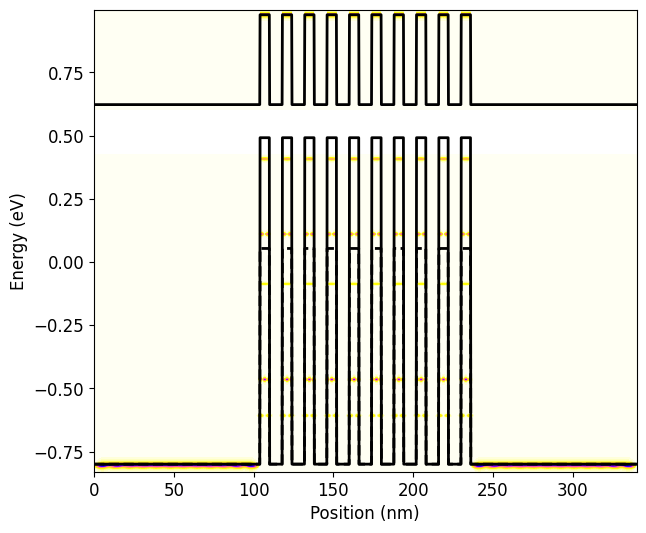

In [30]:
schrodinger_graph_LDOS(result_band_edge)